## Test Notebook

In [104]:
# All imports
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# get raw Dataset
data = pd.read_csv('data/raw_dataset/heart.csv')

display(data.head())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


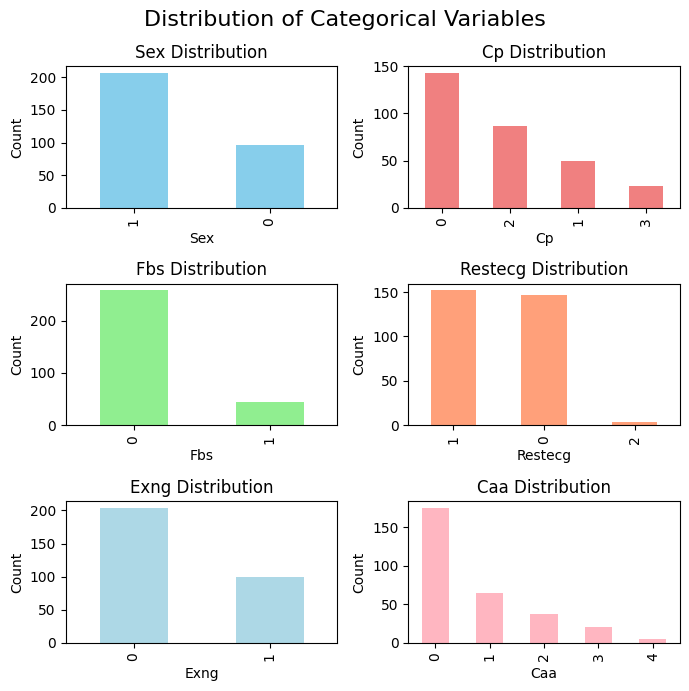

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [106]:
# Display the distribution of categorical variables

# Categorical variables to visualize and their respective colors
categorical_vars = [
    ('sex', 'skyblue'),
    ('cp', 'lightcoral'),
    ('fbs', 'lightgreen'),
    ('restecg', 'lightsalmon'),
    ('exng', 'lightblue'),
    ('caa', 'lightpink')
]

# Create subplots for each categorical variable
fig, axs = plt.subplots(3, 2, figsize=(7, 7))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Loop through each categorical variable and plot its distribution with the specified color
for i, (var, color) in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    data[var].value_counts().plot(kind='bar', ax=axs[row, col,], color=color)
    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

data.describe()

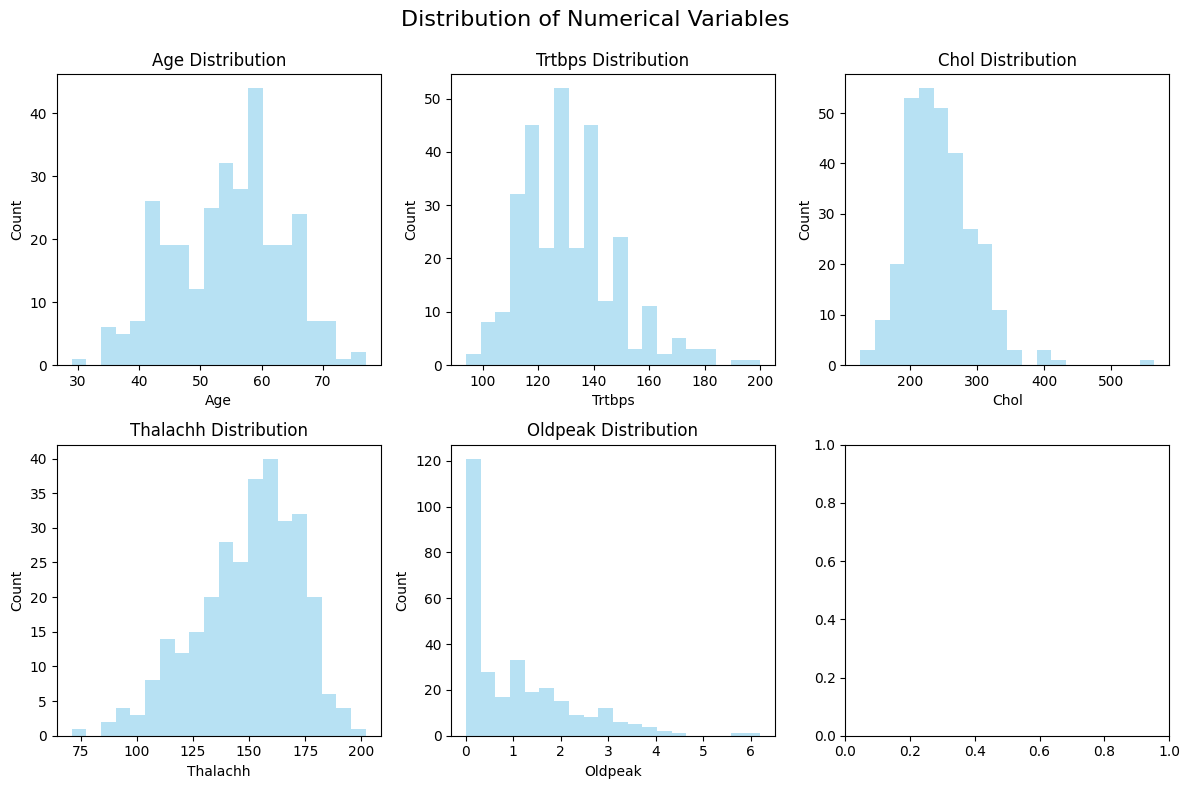

In [107]:
# List of numerical variables
numerical_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Create subplots for each numerical variable
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_vars):
    row = i // 3
    col = i % 3

    # Plot the distribution of the numerical variable
    axs[row, col].hist(data[var], bins=20, color='skyblue', alpha=0.6)
    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Try to scale data:

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
X = data.drop(columns=['output'])  # Features (all columns except 'output')
y = data['output']  # Target variable

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Visualize the distributation again:

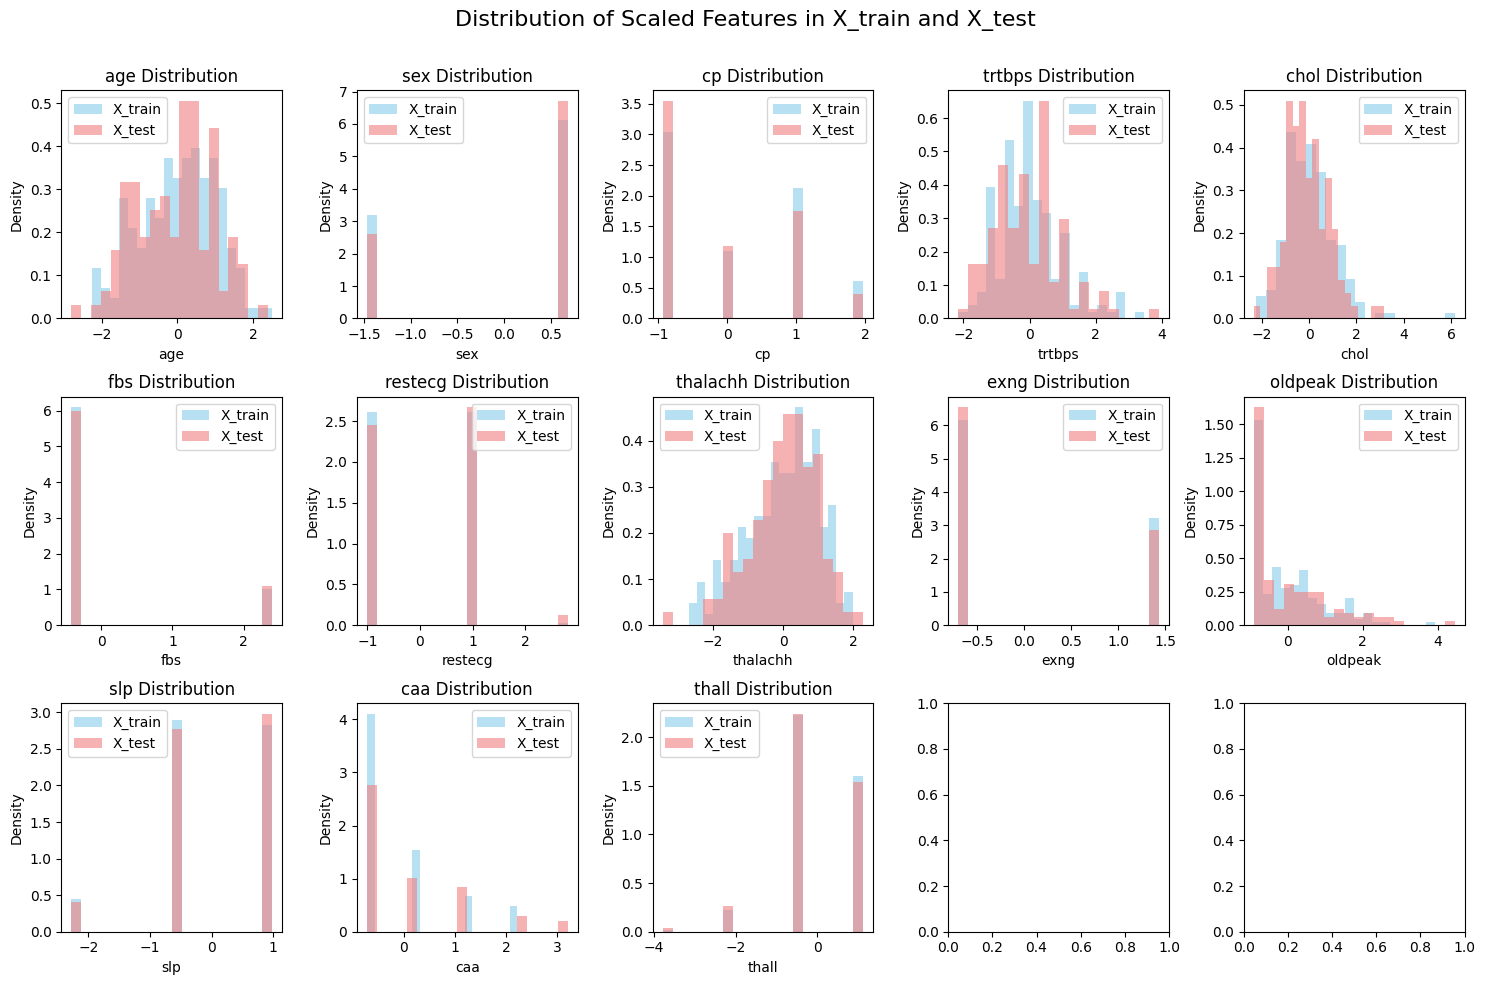

In [109]:
# Extract numerical feature names
numerical_features = X.columns

# Create subplots for each feature
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Distribution of Scaled Features in X_train and X_test', fontsize=16)

for i, feature in enumerate(numerical_features):
    row = i // 5
    col = i % 5

    # Plot X_train feature distribution
    axs[row, col].hist(X_train[:, i], bins=20, color='skyblue', alpha=0.6, label='X_train', density=True)

    # Plot X_test feature distribution
    axs[row, col].hist(X_test[:, i], bins=20, color='lightcoral', alpha=0.6, label='X_test', density=True)

    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
# This code creates distribution plots for each feature in both X_train and X_test, displaying the scaled feature distributions side by side for comparison. Adjust the number of bins and other visualization parameters as needed for your analysis.

## Visualize for test_size=0.3 instead of 0.2

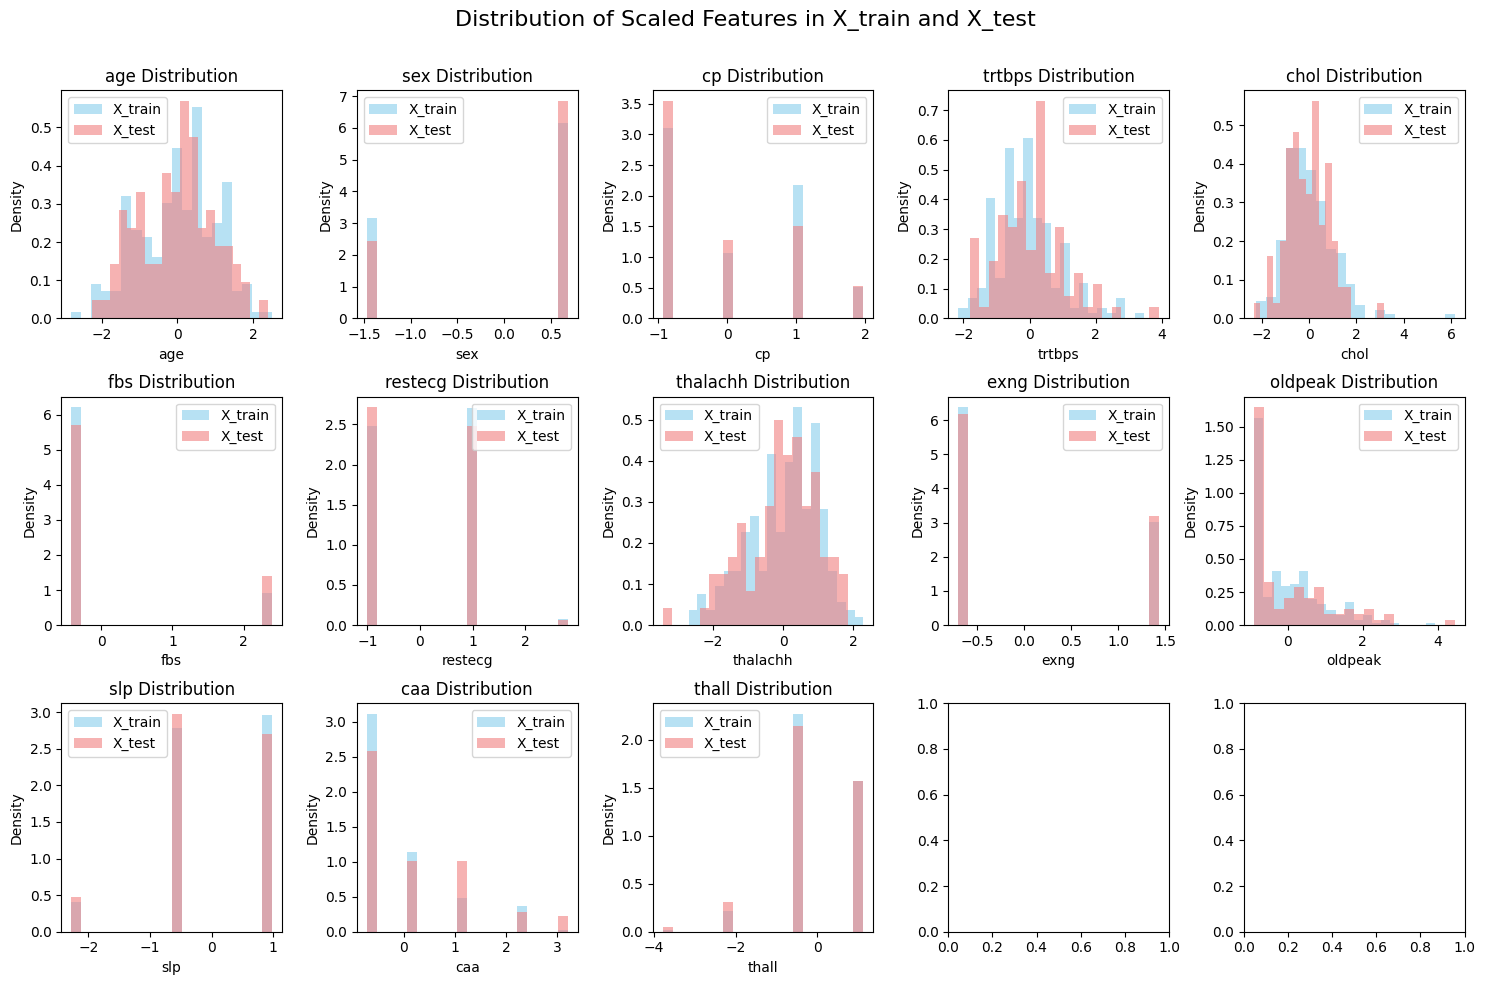

In [111]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Extract numerical feature names
numerical_features = X.columns

# Create subplots for each feature
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Distribution of Scaled Features in X_train and X_test', fontsize=16)

for i, feature in enumerate(numerical_features):
    row = i // 5
    col = i % 5

    # Plot X_train feature distribution
    axs[row, col].hist(X_train[:, i], bins=20, color='skyblue', alpha=0.6, label='X_train', density=True)

    # Plot X_test feature distribution
    axs[row, col].hist(X_test[:, i], bins=20, color='lightcoral', alpha=0.6, label='X_test', density=True)

    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    axs[row, col].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()